In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset0 = pd.read_csv('dataset_0_DUREL.tsv', sep='\t')
dataset0.head()

,word,COMPARE,EARLIER,LATER,delta_later
0,агентство,3.15,3.62,3.55,-0.07
1,археолог,3.69,3.74,3.80,0.06
2,богадельня,3.65,3.30,3.29,-0.01
3,больница,3.86,3.71,3.92,0.21
4,бюрократ,3.51,3.63,3.73,0.10


In [8]:
zipped = zip(dataset0.word.tolist(), dataset0.delta_later.tolist())
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
# zipped

In [9]:
unzipped = [[i for i, j in zipped], [j for i, j in zipped]]

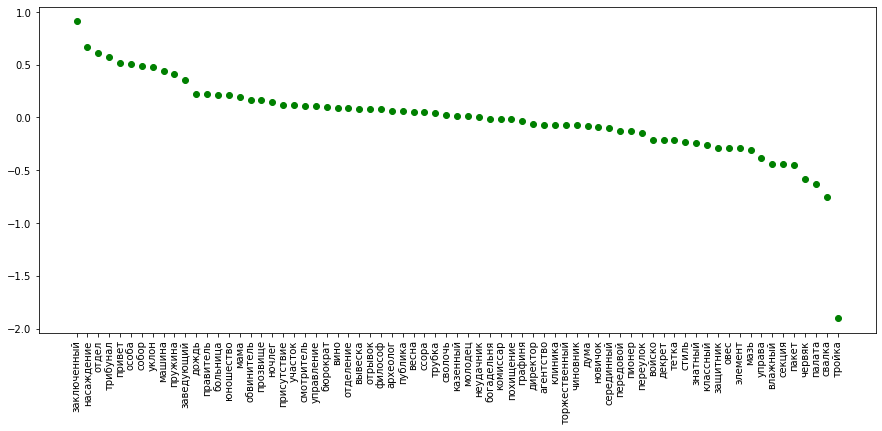

In [13]:
xs = unzipped[0]
ys = unzipped[1]
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.plot(xs, ys, 'go')
plt.show()

In [14]:
dataset1 = pd.read_csv('dataset_1_DUREL.tsv', sep='\t')
dataset1.head()

,word,COMPARE,EARLIER,LATER,delta_later
0,ателье,3.29,3.30,3.19,-0.11
1,бескомпромиссность,3.84,3.76,3.84,0.08
2,беспредел,3.55,3.10,3.25,0.15
3,благотворительность,3.58,3.46,3.69,0.23
4,блочный,2.15,2.57,2.63,0.06


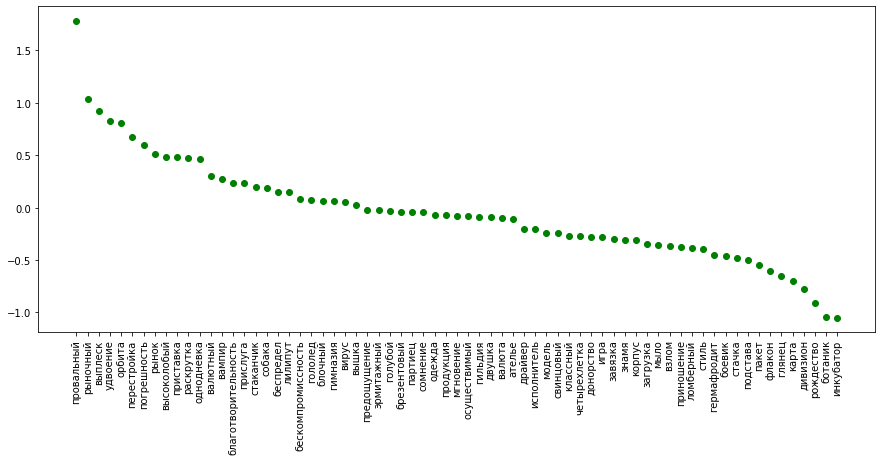

In [16]:
zipped = zip(dataset1.word.tolist(), dataset1.delta_later.tolist())
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)

unzipped = [[i for i, j in zipped], [j for i, j in zipped]]

xs = unzipped[0]
ys = unzipped[1]
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.plot(xs, ys, 'go')
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>

In [3]:
dataset0 = pd.read_csv('dataset_0_ANNOTATED.tsv', sep='\t')

In [5]:
three = dataset0[dataset0.word == 'тройка']
three.head()

,word,sent1,sent2,group,mean,annotator1,annotator2,annotator3,annotator4,annotator5
3615,тройка,"-- Ты обалдел, что ли Кто Ньютон -- и кто ты У...",Добряк) их торжественно построили -- да не ког...,LATER,1.0,1,1,1,1,1
3616,тройка,"-- Это значит, дорогой мой, -- продолжал торже...",Как потом за вашу милость отвечать В это время...,EARLIER,4.0,4,4,4,4,4
3617,тройка,<b><i>Тройка</i></b> здоровых лошадей буланой ...,"Как только показалась эта <b><i>тройка,</i></b...",COMPARE,3.4,4,4,1,4,4
3618,тройка,<b><i>Тройка</i></b> мчалась под гору.,<b><i>Тройке</i></b> быстрых лошадок как будто...,COMPARE,4.0,4,4,4,4,4
3619,тройка,"[Нужно было внешнее влияние на них, чтобы они ...","-- Послушайте, Александр Демьянович, меня вот ...",EARLIER,4.0,4,4,4,4,4


In [11]:
three_earlier = three[three.group == 'EARLIER']
three_later = three[three.group == 'LATER']
three_compare = three[three.group == 'COMPARE']

In [15]:
print(three_compare['annotator1'].value_counts())
print(three_compare['annotator2'].value_counts())
print(three_compare['annotator3'].value_counts())
print(three_compare['annotator4'].value_counts())
print(three_compare['annotator5'].value_counts())

1    10
4     9
2     1
Name: annotator1, dtype: int64
4    9
1    9
2    2
Name: annotator2, dtype: int64
1    11
4     9
Name: annotator3, dtype: int64
4    9
1    7
3    2
2    2
Name: annotator4, dtype: int64
4    11
1     9
Name: annotator5, dtype: int64


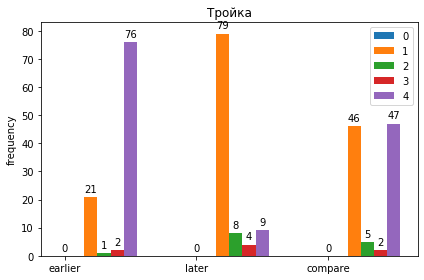

In [34]:
labels = ['earlier', 'later', 'compare']

zeros = [0, 0, 0]
ones = [21, 79, 46]
twos = [1, 8, 5]
threes = [2, 4, 2]
fours = [76, 9, 47]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x, zeros, width, label='0')
rects1 = ax.bar(x + 2*width, ones, width, label='1')
rects2 = ax.bar(x + 3*width, twos, width, label='2')
rects3 = ax.bar(x + 4*width, threes, width, label='3')
rects4 = ax.bar(x + 5*width, fours, width, label='4')

ax.set_ylabel('frequency')
ax.set_title('Тройка')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [4]:
zakl = dataset0[dataset0.word == 'заключенный']
zakl.head()

,word,sent1,sent2,group,mean,annotator1,annotator2,annotator3,annotator4,annotator5
1908,заключенный,"""Моя телеграмма (год, месяц и число): ""Немедле...","Но все-таки не взялись ни за князя Радзивила, ...",COMPARE,1.0,1,1,1,1,1
1909,заключенный,"(В тюрьмах самобытных, серых, заключённые имею...",Вступление § 1. Речь есть двоякая: одна свобод...,COMPARE,1.6,1,1,4,1,1
1910,заключенный,"-- Хоть поговоришь с кем-нибудь, а тут сиди од...","Получено известие из Бухареста, что палата огр...",EARLIER,1.0,1,1,1,1,1
1911,заключенный,-- Что нужно <b><i>заключенному--</i></b> спра...,"""Недоверие к заключённому -- высшая добродетел...",LATER,4.0,4,4,4,4,4
1912,заключенный,...В сквере у подножия соловецких соборов соби...,"Гейсмар колебался выступить из Врацы, потому ч...",COMPARE,1.0,1,1,1,1,1


In [35]:
zakl_earlier = zakl[zakl.group == 'EARLIER']
zakl_later = zakl[zakl.group == 'LATER']
zakl_compare = zakl[zakl.group == 'COMPARE']

In [39]:
print(zakl_earlier['annotator1'].value_counts())
print(zakl_earlier['annotator2'].value_counts())
print(zakl_earlier['annotator3'].value_counts())
print(zakl_earlier['annotator4'].value_counts())
print(zakl_earlier['annotator5'].value_counts())

1    4
4    3
3    2
Name: annotator1, dtype: int64
1    4
4    3
3    2
Name: annotator2, dtype: int64
1    5
4    3
2    1
Name: annotator3, dtype: int64
4    5
1    3
2    1
Name: annotator4, dtype: int64
4    5
1    4
Name: annotator5, dtype: int64


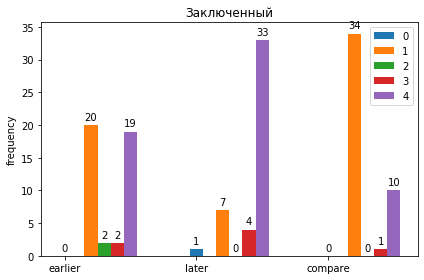

In [40]:
labels = ['earlier', 'later', 'compare']

zeros = [0, 1, 0]
ones = [20, 7, 34]
twos = [2, 0, 0]
threes = [2, 4, 1]
fours = [19, 33, 10]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x, zeros, width, label='0')
rects1 = ax.bar(x + 2*width, ones, width, label='1')
rects2 = ax.bar(x + 3*width, twos, width, label='2')
rects3 = ax.bar(x + 4*width, threes, width, label='3')
rects4 = ax.bar(x + 5*width, fours, width, label='4')

ax.set_ylabel('frequency')
ax.set_title('Заключенный')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

<br>
<br>
<br>
<br>
<br>
<br>

In [41]:
dataset1 = pd.read_csv('dataset_1_ANNOTATED.tsv', sep='\t')

In [42]:
proval = dataset1[dataset1.word == 'провальный']
proval.head()

,word,sent1,sent2,group,mean,annotator1,annotator2,annotator3,annotator4,annotator5
2796,провальный,"""Две средних лет литературные дамы, с грязными...",Второй квартал по динамике производства мог бы...,LATER,3.4,3,3,3,4,4
2797,провальный,"""Деловая хроника"" - экономический журнал, возг...",Но только ли в них дело Разрушители и созидате...,LATER,4.0,4,4,4,4,4
2798,провальный,"-- А ну, иди сюда, -- шепотом сказал Филипп и ...","Пантюша был сутул, на голову ниже Сергея, чере...",EARLIER,1.2,1,2,1,1,1
2799,провальный,. <b><i>Провальное</i></b> выступление сборной...,Чего серчать Наденька на минутку забылась <b><...,COMPARE,1.4,1,1,3,1,1
2800,провальный,"Борьбу с криминалом и коррупцией, администрати...",<b><i>Провальная.</i></b>,COMPARE,3.0,3,3,1,4,4


In [43]:
proval_earlier = proval[proval.group == 'EARLIER']
proval_later = proval[proval.group == 'LATER']
proval_compare = proval[proval.group == 'COMPARE']

In [47]:
print(proval_earlier['annotator1'].value_counts())
print(proval_earlier['annotator2'].value_counts())
print(proval_earlier['annotator3'].value_counts())
print(proval_earlier['annotator4'].value_counts())
print(proval_earlier['annotator5'].value_counts())

1    5
2    3
3    2
4    1
Name: annotator1, dtype: int64
1    6
4    2
2    2
3    1
Name: annotator2, dtype: int64
1    5
2    3
4    2
3    1
Name: annotator3, dtype: int64
1    8
4    2
3    1
Name: annotator4, dtype: int64
1    6
3    2
2    2
4    1
Name: annotator5, dtype: int64


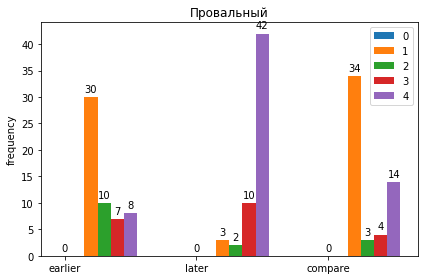

In [48]:
labels = ['earlier', 'later', 'compare']

zeros = [0, 0, 0]
ones = [30, 3, 34]
twos = [10, 2, 3]
threes = [7, 10, 4]
fours = [8, 42, 14]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x, zeros, width, label='0')
rects1 = ax.bar(x + 2*width, ones, width, label='1')
rects2 = ax.bar(x + 3*width, twos, width, label='2')
rects3 = ax.bar(x + 4*width, threes, width, label='3')
rects4 = ax.bar(x + 5*width, fours, width, label='4')

ax.set_ylabel('frequency')
ax.set_title('Провальный')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [50]:
ink = dataset1[dataset1.word == 'инкубатор']
ink.head()

,word,sent1,sent2,group,mean,annotator1,annotator2,annotator3,annotator4,annotator5
1548,инкубатор,"-- Ах, <b><i>инкубатор!</i></b>","Яйца закладывают в <b><i>инкубатор,</i></b> вы...",EARLIER,3.8,4,4,4,3,4
1549,инкубатор,-- В <b><i>инкубаторе</i></b> выращивается чел...,По последнему слову техники оборудованы были ф...,LATER,2.0,2,4,2,1,1
1550,инкубатор,"-- Это у вас от невнимательности, -- сказал он...",Мишка раскрыл книгу и стал показывать чертежи;...,EARLIER,4.0,4,4,4,4,4
1551,инкубатор,14 богатейших бизнесменов и компаний страны со...,"Для этого необходимо, во-первых, как минимум в...",LATER,3.6,4,3,4,4,3
1552,инкубатор,<b><i>Инкубатор</i></b> любви!,После этого 100 мкл смеси СП + AT + РСВ перено...,LATER,1.8,3,1,2,2,1


In [51]:
ink_earlier = ink[ink.group == 'EARLIER']
ink_later = ink[ink.group == 'LATER']
ink_compare = ink[ink.group == 'COMPARE']

In [54]:
print(ink_compare['annotator1'].value_counts())
print(ink_compare['annotator2'].value_counts())
print(ink_compare['annotator3'].value_counts())
print(ink_compare['annotator4'].value_counts())
print(ink_compare['annotator5'].value_counts())

1    8
2    6
4    4
3    2
Name: annotator1, dtype: int64
1    8
4    7
2    4
3    1
Name: annotator2, dtype: int64
1    8
4    6
2    4
3    2
Name: annotator3, dtype: int64
1    12
3     4
4     3
2     1
Name: annotator4, dtype: int64
1    8
4    6
2    4
3    2
Name: annotator5, dtype: int64


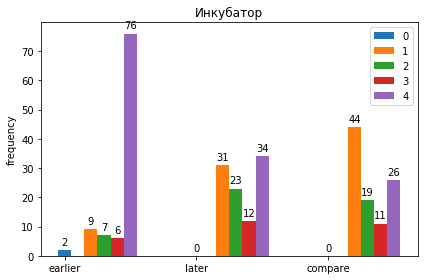

In [55]:
labels = ['earlier', 'later', 'compare']

zeros = [2, 0, 0]
ones = [9, 31, 44]
twos = [7, 23, 19]
threes = [6, 12, 11]
fours = [76, 34, 26]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x, zeros, width, label='0')
rects1 = ax.bar(x + 2*width, ones, width, label='1')
rects2 = ax.bar(x + 3*width, twos, width, label='2')
rects3 = ax.bar(x + 4*width, threes, width, label='3')
rects4 = ax.bar(x + 5*width, fours, width, label='4')

ax.set_ylabel('frequency')
ax.set_title('Инкубатор')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()